In [6]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

8.4.1  Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика. Данные для построения графика хранятся здесь.

In [3]:
url = 'https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv'

In [4]:
df = pd.read_csv(url)

In [14]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


In [36]:
df1 = df.groupby(['date', 'user_type'], as_index=False) \
    .agg({'visits': 'sum'})

In [37]:
df1

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


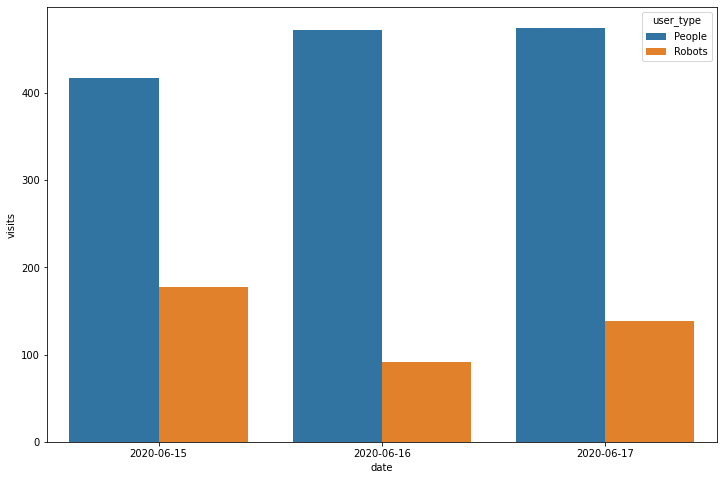

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x='date', y='visits', hue='user_type', data=df1)

8.4.2   Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.

In [107]:
url2 = 'https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv'

In [108]:
step_2 = pd.read_csv(url2)

In [109]:
step_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [110]:
((step_2.visits[0] / step_2.visits.sum()) * 100).round()

60.0

8.4.4  Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений?

В качестве ответа укажите название браузера.

In [111]:
url3 = 'https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv'

In [112]:
step_3 = pd.read_csv(url3)

In [113]:
data_for_all = step_3.groupby('browser', as_index=False) \
        .agg({'visits': 'sum'}) \
        .rename(columns={'visits': 'sum_visits_all'})

In [114]:
data_for_all

,browser,sum_visits_all
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [115]:
data_for_bots = step_3.query('user_type == "Robots"') \
        .groupby('browser', as_index=False) \
        .agg({'visits': 'sum'}) \
        .rename(columns={'visits': 'sum_visits_bots'})

In [76]:
all_sum = step_2.visits.sum()

In [77]:
all_sum

594.0

In [116]:
data_for_bots

,browser,sum_visits_bots
0,Chromium,1.0
1,Edge,1.0
2,Firefox,31.0
3,Google Chrome,104.0
4,Mobile Safari,1.0
5,Opera,5.0
6,Safari,22.0
7,Samsung Internet,1.0
8,UCWEB,4.0
9,Yandex Browser,7.0


In [117]:
data_for_bots = data_for_bots.merge(data_for_all, on='browser', how='right')

In [125]:
data_for_bots= data_for_bots.dropna()

In [128]:
data_for_bots['dole_bots'] = data_for_bots.sum_visits_bots / data_for_bots.sum_visits_all

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
data_for_bots.sort_values('dole_bots')

,browser,sum_visits_bots,sum_visits_all,dole_bots
7,Mobile Safari,1.0,16.0,0.062500
10,Samsung Internet,1.0,9.0,0.111111
13,Yandex Browser,7.0,54.0,0.129630
4,Edge,1.0,5.0,0.200000
6,Google Chrome,104.0,354.0,0.293785
8,Opera,5.0,16.0,0.312500
2,Chromium,1.0,2.0,0.500000
5,Firefox,31.0,58.0,0.534483
9,Safari,22.0,41.0,0.536585
11,UCWEB,4.0,4.0,1.000000


In [130]:
1/16

0.0625

8.4.5 Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

In [11]:
url5 = 'https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv'

In [12]:
step_5 = pd.read_csv(url5)

In [13]:
step_5.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [14]:
step_5.visits.sum()

594.0

In [15]:
step_5['all_visits'] = (step_5.visits / step_5.visits.sum()) * 100

In [16]:
step_5_safari = step_5.query('browser == "Safari" and user_type == "People"')

In [24]:
step_5

,date,browser,user_type,visits,all_visits
0,2020-06-15,Google Chrome,People,250.0,42.087542
1,2020-06-15,Google Chrome,Robots,104.0,17.508418
2,2020-06-15,Yandex Browser,People,47.0,7.912458
3,2020-06-15,Firefox,Robots,31.0,5.218855
4,2020-06-15,Chrome Mobile,People,31.0,5.218855
5,2020-06-15,Firefox,People,27.0,4.545455
6,2020-06-15,Safari,Robots,22.0,3.703704
7,2020-06-15,Safari,People,19.0,3.198653
8,2020-06-15,Mobile Safari,People,15.0,2.525253
9,2020-06-15,Opera,People,11.0,1.851852


In [17]:
step_5_safari.all_visits.round(1)

7    3.2
Name: all_visits, dtype: float64

In [ ]:
Лучше посмотртеь видосы от них.   Идет туговато!

In [ ]:
При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи VK API себе в личку ВКонтакте. 


In [18]:
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [2]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
my_mail = 'brucecactus101@gmail.com'

#my_mail = 'brucecactus101@gmail.com'

# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name('./creds.json', scope)
gs = gspread.authorize(credentials)

NameError: name 'ServiceAccountCredentials' is not defined

Другой аналитик уже агрегировал часть данных из метрики. Вам нужно объединить усилия, чтобы получить финальный 
отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с 
таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру 
и значениям Robots/People.
В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

In [9]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv')

In [11]:
df.head(10)

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [12]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df2 = pd.read_csv(BytesIO(data))

In [13]:
df2

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0
5,2020-06-15,Firefox,People,26.0
6,2020-06-15,Safari,Robots,20.0
7,2020-06-15,Safari,People,17.0
8,2020-06-15,Mobile Safari,People,14.0
9,2020-06-15,Opera,People,10.0


In [15]:
full_data = df.merge(df2, on=['date', 'browser', 'user_type'])

In [16]:
full_data['ratio'] = full_data.visits / full_data.users

In [17]:
full_data

,date,browser,user_type,visits,users,ratio
0,2020-06-15,Google Chrome,People,250.0,240.0,1.041667
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.000000
2,2020-06-15,Yandex Browser,People,47.0,44.0,1.068182
3,2020-06-15,Firefox,Robots,31.0,29.0,1.068966
4,2020-06-15,Chrome Mobile,People,31.0,30.0,1.033333
5,2020-06-15,Firefox,People,27.0,26.0,1.038462
6,2020-06-15,Safari,Robots,22.0,20.0,1.100000
7,2020-06-15,Safari,People,19.0,17.0,1.117647
8,2020-06-15,Mobile Safari,People,15.0,14.0,1.071429
9,2020-06-15,Opera,People,11.0,10.0,1.100000


In [18]:
full_data.query('browser == "Google Chrome" and user_type == "Robots"')

,date,browser,user_type,visits,users,ratio
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
